<a href="https://colab.research.google.com/github/pigyechan/DataAnalysis/blob/main/20220705_StatPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np

bank = pd.read_csv("/content/sample_data/bank.csv", sep=";")
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [22]:
bank.describe(include="all")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521,4521,4521,4521,4521.000000,4521,4521,4521,4521.000000,4521,4521.000000,4521.000000,4521.000000,4521.000000,4521,4521
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,969,2797,2306,4445,NaN,2559,3830,2896,NaN,1398,NaN,NaN,NaN,NaN,3705,4000
mean,41.170095,NaN,NaN,NaN,NaN,1422.657819,NaN,NaN,NaN,15.915284,NaN,263.961292,2.793630,39.766645,0.542579,NaN,NaN
std,10.576211,NaN,NaN,NaN,NaN,3009.638142,NaN,NaN,NaN,8.247667,NaN,259.856633,3.109807,100.121124,1.693562,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,444.000000,NaN,NaN,NaN,16.000000,NaN,185.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1480.000000,NaN,NaN,NaN,21.000000,NaN,329.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [24]:
bank["marital"].value_counts()

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

In [26]:
bank["age"].std()

10.576210958711261

In [27]:
bank["age"].skew()

0.6995014533559305

In [28]:
bank["age"].kurtosis()

0.3487754872611486

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

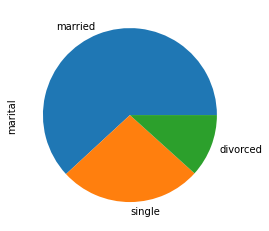

In [30]:
bank["marital"].value_counts().plot(kind="pie")
plt.show()

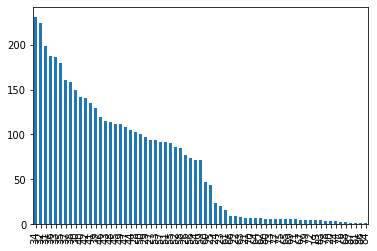

In [31]:
bank["age"].value_counts().plot(kind="bar")
plt.show()

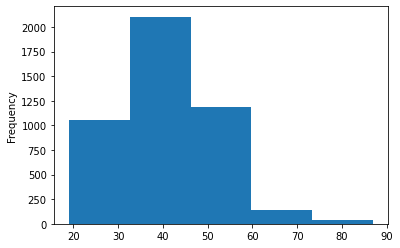

In [50]:
bank["age"].plot(kind="hist", bins= 5)
# 각각의 나이에 따른 사람 수가 중요한 게 아니라 전체적인 범위를 정해두고 
# 그 범위에 따른 사람 수가 중요한 것이기 때문에 count를 없앰.
plt.show()

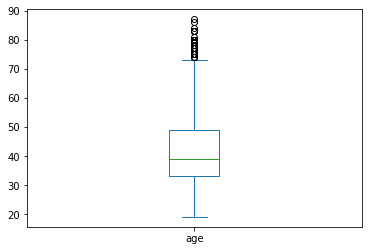

In [39]:
bank["age"].plot(kind="box")
plt.show()

In [40]:
import seaborn as sns

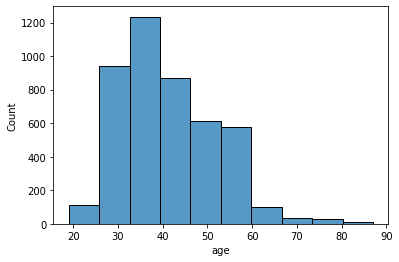

In [46]:
sns.histplot(bank["age"], bins=10)
plt.show()

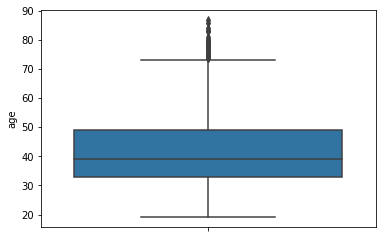

In [47]:
sns.boxplot(data=bank, y="age")
plt.show()

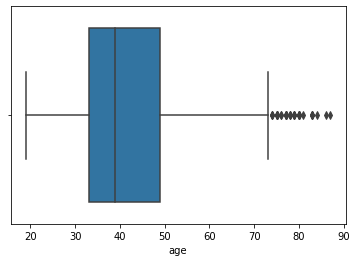

In [48]:
sns.boxplot(data=bank, x="age")
plt.show()

In [51]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [69]:
#교차분석: 두가지 이상의 범주형 변수를 분석하기 위한 통계적 방법
cross_tab= pd.crosstab(bank.education, bank.marital, margins=True, normalize=True)
#margins는 전체 총합 확인 가능. normalize는 전체에 대한 해당 비율로 표기

In [61]:
#교차표// 독립변수에 따라 종속변수가 차이가 없다라는 것을 기각하기 위해 교차분석을 하는 것.
#차이가 있음을 증명.
from scipy import stats

In [67]:
stats.chi2_contingency(cross_tab)

(139.08916465578477,
 1.560113682338989e-27,
 6,
 array([[  79.18248175,  419.45719973,  179.36031851],
        [ 269.31386861, 1426.64941385,  610.03671754],
        [ 157.66423358,  835.20238885,  357.13337757],
        [  21.83941606,  115.69099757,   49.46958637]]))

(528/4521 * 678/4521)*4521

education에 따라 marital에 차이가 있다.

p<0.05 이면 대립

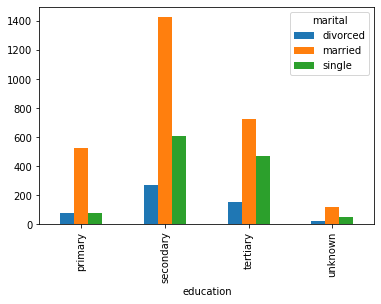

In [68]:
cross_tab.plot(kind="bar")
plt.show()

In [86]:
cross_tab= pd.crosstab(bank.y, bank.marital)
stats.chi2_contingency(cross_tab)

(19.03005634409817,
 7.373535401823763e-05,
 2,
 array([[ 467.15328467, 2474.67374475, 1058.17297058],
        [  60.84671533,  322.32625525,  137.82702942]]))

In [87]:
cross_tab= pd.crosstab(bank.y, bank.education)
stats.chi2_contingency(cross_tab)

(15.236579554873757,
 0.001625240003630989,
 3,
 array([[ 599.867286  , 2040.2565804 , 1194.42601194,  165.45012165],
        [  78.132714  ,  265.7434196 ,  155.57398806,   21.54987835]]))

In [88]:
cross_tab= pd.crosstab(bank.y, bank.job)
stats.chi2_contingency(cross_tab)

(68.98828575267176,
 1.901391096662705e-10,
 11,
 array([[422.91528423, 836.98296837, 148.63968149,  99.09312099,
         857.33244857, 203.49480203, 161.91108162, 368.94492369,
          74.31984074, 679.49568679, 113.24928113,  33.62088034],
        [ 55.08471577, 109.01703163,  19.36031851,  12.90687901,
         111.66755143,  26.50519797,  21.08891838,  48.05507631,
           9.68015926,  88.50431321,  14.75071887,   4.37911966]]))

In [89]:
cross_tab= pd.crosstab(bank.y, bank.housing)
stats.chi2_contingency(cross_tab)

(48.88462833144263,
 2.7146998959323014e-12,
 1,
 array([[1735.89913736, 2264.10086264],
        [ 226.10086264,  294.89913736]]))

In [91]:
cross_tab= pd.crosstab(bank.y, bank.loan)
stats.chi2_contingency(cross_tab)

(21.87182161746215,
 2.9148288298428256e-06,
 1,
 array([[3388.63083389,  611.36916611],
        [ 441.36916611,   79.63083389]]))

In [92]:
cross_tab= pd.crosstab(bank.y, bank.default)
stats.chi2_contingency(cross_tab)
#서로 독립적

(0.008753166978396806,
 0.9254599873026758,
 1,
 array([[3932.75823933,   67.24176067],
        [ 512.24176067,    8.75823933]]))

In [ ]:
#상관분석: 두 연속형 변수간에 상관관계가 존재하는지를 파악하고 상관관계의 정도를 측정
import matplotlib.pyplot as plt
%matplotlib inline

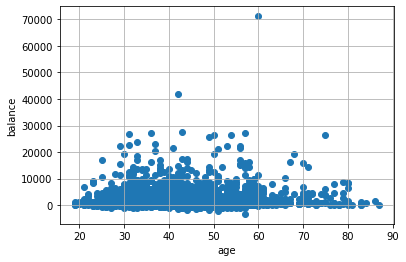

In [94]:
plt.scatter(bank.age, bank.balance)
plt.xlabel("age")
plt.ylabel("balance")
plt.grid()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


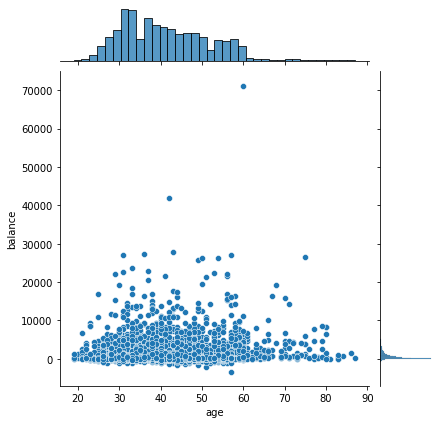

In [99]:
corr=sns.jointplot(bank.age, bank.balance)
corr
#산점도, 히스토그램 그리기

In [98]:
stats.pearsonr(bank.age, bank.balance)
#상관계수, p-value
#두 변수사이의 상관은 거의 없다.

(0.08382014224477764, 1.658480874647685e-08)

In [103]:
list_int64=[]
for i in bank.columns:
  if bank[i].dtype=='int64':
    list_int64.append(i)

print(list_int64)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [104]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [106]:
bank_ctn=bank[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']]
bank_ctn.head()

,age,balance,duration,campaign,pdays,previous
0,30,1787,79,1,-1,0
1,33,4789,220,1,339,4
2,35,1350,185,1,330,1
3,30,1476,199,4,-1,0
4,59,0,226,1,-1,0


In [111]:
bank_ctn.corr()

,age,balance,duration,campaign,pdays,previous
age,1.000000,0.083820,-0.002367,-0.005148,-0.008894,-0.003511
balance,0.083820,1.000000,-0.015950,-0.009976,0.009437,0.026196
duration,-0.002367,-0.015950,1.000000,-0.068382,0.010380,0.018080
campaign,-0.005148,-0.009976,-0.068382,1.000000,-0.093137,-0.067833
pdays,-0.008894,0.009437,0.010380,-0.093137,1.000000,0.577562
previous,-0.003511,0.026196,0.018080,-0.067833,0.577562,1.000000


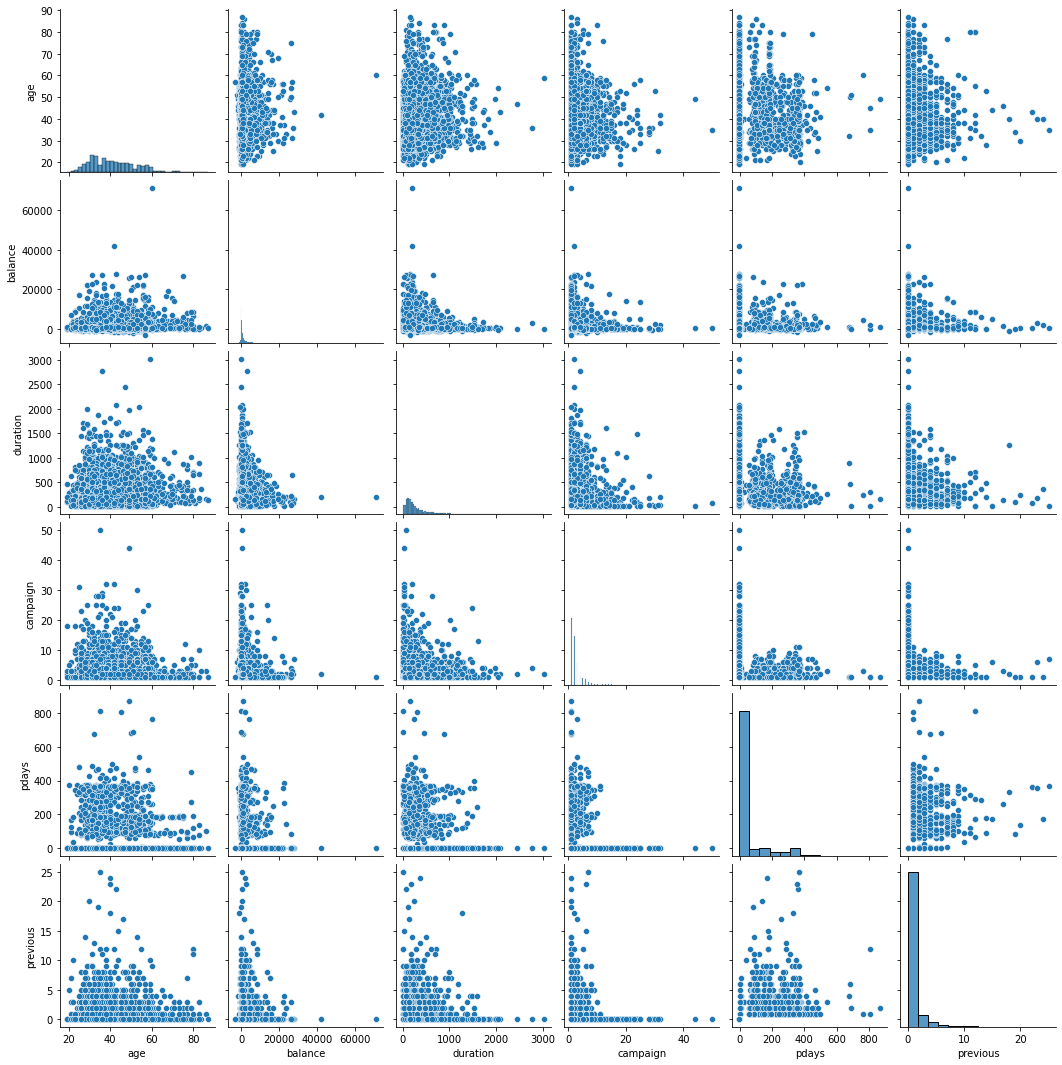

In [112]:
sns.pairplot(bank_ctn)

In [114]:
#평균차이분석(분산분석)
bank.groupby(bank["marital"]).describe().T

marital             divorced       married        single
age      count    528.000000   2797.000000   1196.000000
         mean      45.475379     43.454415     33.927258
         std       10.116183     10.309992      7.506353
         min       26.000000     23.000000     19.000000
         25%       37.000000     35.000000     29.000000
         50%       45.000000     42.000000     32.000000
         75%       53.000000     51.000000     37.000000
         max       84.000000     87.000000     69.000000
balance  count    528.000000   2797.000000   1196.000000
         mean    1122.390152   1463.195567   1460.414716
         std     2199.922010   3188.571513   2879.810214
         min    -1148.000000  -3313.000000  -1313.000000
         25%       31.250000     72.000000     81.000000
         50%      367.500000    452.000000    462.000000
         75%     1245.000000   1521.000000   1509.000000
         max    26306.000000  71188.000000  27733.000000
day      count    528.000000   2797.000000   1196.000000
         mean      15.753788     15.905971     16.008361
         std        8.154578      8.139482      8.540424
         min        1.000000      1.000000      1.000000
         25%        9.000000      9.000000      8.000000
         50%       15.000000     16.000000     16.000000
         75%       21.000000     21.000000     22.000000
         max       31.000000     31.000000     31.000000
duration count    528.000000   2797.000000   1196.000000
         mean     279.232955    256.528781    274.601171
         std      279.813039    249.714248    273.195384
         min        5.000000      4.000000      5.000000
         25%      106.000000    104.000000    103.000000
         50%      186.000000    183.000000    191.000000
         75%      347.000000    320.000000    344.250000
         max     2456.000000   3025.000000   1994.000000
campaign count    528.000000   2797.000000   1196.000000
         mean       2.604167      2.847336      2.751672
         std        2.693823      3.223207      3.007834
         min        1.000000      1.000000      1.000000
         25%        1.000000      1.000000      1.000000
         50%        2.000000      2.000000      2.000000
         75%        3.000000      3.000000      3.000000
         max       28.000000     50.000000     28.000000
pdays    count    528.000000   2797.000000   1196.000000
         mean      38.827652     38.466929     43.220736
         std      103.575613     98.797126    101.639686
         min       -1.000000     -1.000000     -1.000000
         25%       -1.000000     -1.000000     -1.000000
         50%       -1.000000     -1.000000     -1.000000
         75%       -1.000000     -1.000000     -1.000000
         max      871.000000    808.000000    804.000000
previous count    528.000000   2797.000000   1196.000000
         mean       0.439394      0.519128      0.642977
         std        1.473395      1.660600      1.850150
         min        0.000000      0.000000      0.000000
         25%        0.000000      0.000000      0.000000
         50%        0.000000      0.000000      0.000000
         75%        0.000000      0.000000      0.000000
         max       22.000000     25.000000     20.000000

In [116]:
bank.groupby("marital")[["age"]].describe().T

marital      divorced      married       single
age count  528.000000  2797.000000  1196.000000
    mean    45.475379    43.454415    33.927258
    std     10.116183    10.309992     7.506353
    min     26.000000    23.000000    19.000000
    25%     37.000000    35.000000    29.000000
    50%     45.000000    42.000000    32.000000
    75%     53.000000    51.000000    37.000000
    max     84.000000    87.000000    69.000000

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


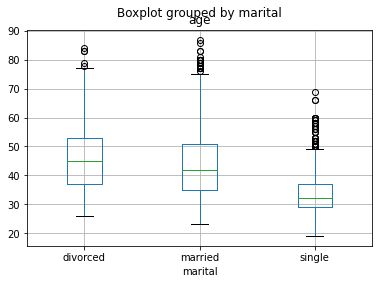

In [118]:
bank.boxplot(column="age", by="marital")
#동그라미는 이상치

In [122]:
divorced = bank[bank["marital"]=="divorced"].age.values
married = bank[bank["marital"]=="married"].age.values
single = bank[bank["marital"]=="single"].age.values

print(divorced)
print(married)
print(single)

[38 42 68 42 78 45 54 51 42 54 41 50 27 36 46 31 77 32 56 45 35 45 40 57
 39 48 55 42 56 51 42 53 49 45 70 65 47 51 48 53 35 75 49 42 55 37 35 43
 45 35 55 33 48 42 48 45 43 49 46 47 36 35 43 60 43 58 36 58 33 41 35 57
 46 50 58 36 55 41 32 35 35 52 43 57 37 37 51 37 49 38 53 53 45 40 55 48
 46 51 33 50 51 33 32 54 51 39 50 34 33 44 58 55 53 36 34 56 43 37 58 56
 52 55 39 47 41 53 28 50 26 45 50 36 38 43 41 35 52 60 36 41 38 27 54 53
 41 60 49 32 75 37 33 32 55 35 33 43 41 46 55 46 59 33 40 55 43 65 53 33
 51 48 49 49 57 36 75 51 56 57 53 44 51 47 42 57 54 50 31 28 45 42 60 47
 47 46 29 32 42 29 33 36 52 44 51 42 51 40 38 44 48 58 39 56 49 33 35 40
 39 44 59 54 48 34 39 35 49 59 44 44 40 42 41 46 50 55 56 37 58 74 54 42
 59 41 51 50 56 41 38 34 46 52 38 35 46 62 41 32 51 52 56 54 35 41 55 42
 42 42 32 49 47 47 57 34 47 36 51 54 38 37 56 33 35 32 42 54 41 33 49 42
 50 59 50 35 31 47 56 53 38 59 44 48 56 44 56 38 34 40 46 50 46 45 33 35
 45 31 56 47 56 48 45 55 64 45 44 47 46 54 35 35 53

In [123]:
len(single)

1196

In [124]:
stats.f_oneway(divorced, married, single)
#F, p-value
#marital에 따라 age에 유의한 차이가 있음.

F_onewayResult(statistic=470.30983916397145, pvalue=2.8405222686637417e-186)

In [128]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog = bank["age"], groups = bank["marital"], alpha =0.05)

tukey.summary()
#divored와 married는 평균 차이가 -2.021이고, reject가 true이므로 
#이들 group간에는 평균 차이 있다.

group1,group2,meandiff,p-adj,lower,upper,reject
divorced,married,-2.021,0.001,-3.0916,-0.9503,True
divorced,single,-11.5481,0.001,-12.7271,-10.3692,True
married,single,-9.5272,0.001,-10.3067,-8.7476,True


Endog: 종속변수

groups: 독립변수

alpha: 기각역, 유의수준

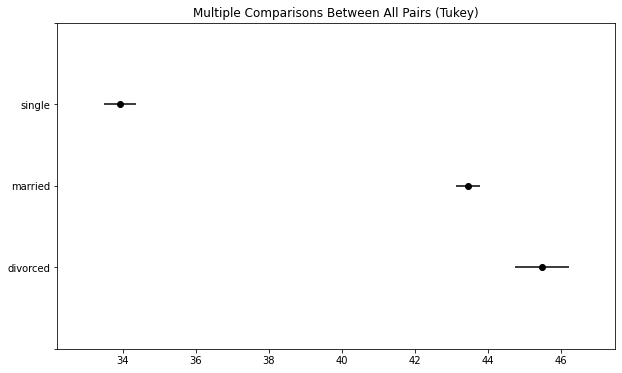

In [130]:
fig=tukey.plot_simultaneous()
#집단별 신뢰구간 도표
#그림에서 서로 겹치지 않는 집단이 통계적으로 유의미한 차이가 있다고 할 수 있음.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

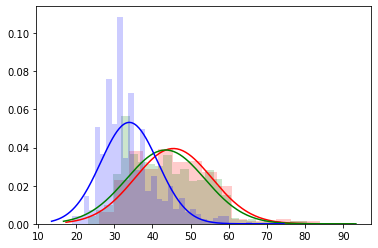

In [135]:
sns.distplot(divorced, hist_kws={'color':'r', "alpha":0.2}, 
            fit_kws={'color':'r'}, fit=stats.norm, kde=False)
sns.distplot(married, hist_kws={'color':'g', "alpha":0.2}, 
            fit_kws={'color':'g'}, fit=stats.norm, kde=False)
sns.distplot(single, hist_kws={'color':'b', "alpha":0.2}, 
            fit_kws={'color':'b'}, fit=stats.norm, kde=False)

kde: 밀도함수(kernel density)

alpha: 투명도(0~1)

norm: 정규분포

In [141]:
tukey1 = pairwise_tukeyhsd(endog = bank["age"], groups = bank["y"], alpha =0.05)
tukey1.summary()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


group1,group2,meandiff,p-adj,lower,upper,reject
no,yes,1.4934,0.0024,0.5285,2.4582,True


In [142]:
tukey2 = pairwise_tukeyhsd(endog = bank["balance"], groups = bank["y"], alpha =0.05)
tukey2.summary()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


group1,group2,meandiff,p-adj,lower,upper,reject
no,yes,168.7441,0.2287,-106.0615,443.5497,False


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


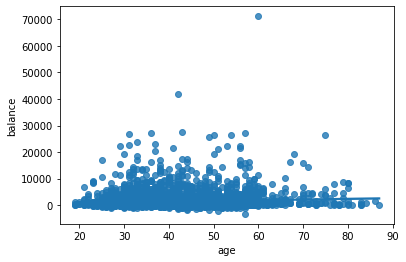

In [146]:
#회기분석: 독립변수와 종속변수가 모두 연속형인 경우, 변수간 인과관계를 파악하기 위함
#두 변수 사이의 선형식을 구해 종속변수에 대한 독립변수의 예측력을 분석

sns.regplot("age", "balance", bank)
plt.show()

In [147]:
stats.pearsonr(bank.age, bank.balance)

(0.08382014224477764, 1.658480874647685e-08)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


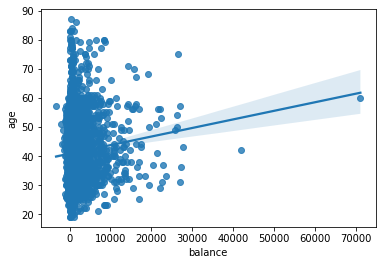

In [148]:
sns.regplot("balance","age", bank)
plt.show()

In [149]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [151]:
linear_model=smf.ols(formula="balance ~ age", data=bank).fit()

In [152]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                balance   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     31.97
Date:                Tue, 05 Jul 2022   Prob (F-statistic):           1.66e-08
Time:                        07:14:17   Log-Likelihood:                -42610.
No. Observations:                4521   AIC:                         8.522e+04
Df Residuals:                    4519   BIC:                         8.524e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    440.6511    179.303      2.458      0.014      89.129     792.173
age           23.8524      4.218      5.655      0.000      15.583      32.122
==============================================================================
Omnibus:                     5648.224   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1475688.206
Skew:                           6.557   Prob(JB):                         0.00
Kurtosis:                      90.532   Cond. No.                         171.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

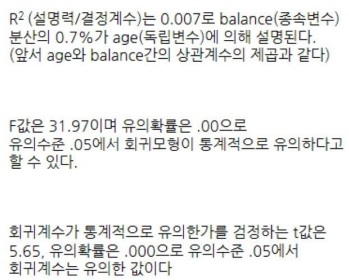

y(balance) = 23.8525*X(age)+440.6511

In [154]:
linear_model2=smf.ols(formula="balance ~ age + duration", data=bank).fit()
linear_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                balance   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     16.55
Date:                Tue, 05 Jul 2022   Prob (F-statistic):           6.88e-08
Time:                        07:21:09   Log-Likelihood:                -42609.
No. Observations:                4521   AIC:                         8.522e+04
Df Residuals:                    4518   BIC:                         8.524e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    489.2434    185.040      2.644      0.008     126.475     852.012
age           23.8418      4.218      5.652      0.000      15.572      32.112
duration      -0.1824      0.172     -1.063      0.288      -0.519       0.154
==============================================================================
Omnibus:                     5645.633   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1473941.067
Skew:                           6.551   Prob(JB):                         0.00
Kurtosis:                      90.480   Cond. No.                     1.54e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

y(balance)= 23.8418 * X1(age) + (-0.1824) * X2(duration)+489.2434

In [157]:
print(linear_model2.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.007     
Dependent Variable: balance          AIC:                85224.6148
Date:               2022-07-05 07:26 BIC:                85243.8643
No. Observations:   4521             Log-Likelihood:     -42609.   
Df Model:           2                F-statistic:        16.55     
Df Residuals:       4518             Prob (F-statistic): 6.88e-08  
R-squared:          0.007            Scale:              8.9960e+06
--------------------------------------------------------------------
              Coef.    Std.Err.     t     P>|t|    [0.025    0.975] 
--------------------------------------------------------------------
Intercept    489.2434  185.0400   2.6440  0.0082  126.4745  852.0123
age           23.8418    4.2182   5.6521  0.0000   15.5721   32.1115
duration      -0.1824    0.1717  -1.0626  0.2880   -0.5190    0.1541
------------------------------------------------------------